In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
degrees_that_pay_back = pd.read_csv('degrees-that-pay-back.csv')
salaries_by_college_type = pd.read_csv('salaries-by-college-type.csv')
salaries_by_region = pd.read_csv ('salaries-by-region.csv')

In [3]:
df = pd.merge(salaries_by_college_type,salaries_by_region, on = 'School Name',how = 'left')

In [4]:
df.drop(['Starting Median Salary_y','Mid-Career Median Salary_y','Mid-Career 10th Percentile Salary_y',
        'Mid-Career 25th Percentile Salary_y','Mid-Career 75th Percentile Salary_y',
        'Mid-Career 90th Percentile Salary_y'],axis = 1,inplace = True) 
df

,School Name,School Type,Starting Median Salary_x,Mid-Career Median Salary_x,Mid-Career 10th Percentile Salary_x,Mid-Career 25th Percentile Salary_x,Mid-Career 75th Percentile Salary_x,Mid-Career 90th Percentile Salary_x,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern
5,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00",Northeastern
6,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00",Northeastern
7,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00",Northeastern
8,Georgia Institute of Technology,Engineering,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00",Southern
9,Colorado School of Mines,Engineering,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00",Western


In [5]:
df.columns = ['School_Name','School_Type','Starting_Median_Salary','Mid_Career_Median_Salary',
             'Mid_Career_10th_Percentile_Salary','Mid_Career_25th_Percentile_Salary',
             'Mid_Career_75th_Percentile_Salary','Mid_Career_90th_Percentile_Salary','Region']

df.drop(['Mid_Career_10th_Percentile_Salary','Mid_Career_90th_Percentile_Salary'],axis = 1, inplace = True)

df['Starting_Median_Salary']= df['Starting_Median_Salary'].str.replace('$','')
df['Starting_Median_Salary']= df['Starting_Median_Salary'].str.replace(',','')
df['Starting_Median_Salary']= df['Starting_Median_Salary'].replace('.00','')
df['Starting_Median_Salary'] = df['Starting_Median_Salary'].astype(float)

df['Mid_Career_Median_Salary']= df['Mid_Career_Median_Salary'].str.replace('$','')
df['Mid_Career_Median_Salary']= df['Mid_Career_Median_Salary'].str.replace(',','')
df['Mid_Career_Median_Salary']= df['Mid_Career_Median_Salary'].replace('.00','')
df['Mid_Career_Median_Salary'] = df['Mid_Career_Median_Salary'].astype(float)

df['Mid_Career_25th_Percentile_Salary'] = df['Mid_Career_25th_Percentile_Salary'].str.replace('$','')
df['Mid_Career_25th_Percentile_Salary'] = df['Mid_Career_25th_Percentile_Salary'].str.replace(',','')
df['Mid_Career_25th_Percentile_Salary'] = df['Mid_Career_25th_Percentile_Salary'].replace('.00','')
df['Mid_Career_25th_Percentile_Salary'] = df['Mid_Career_25th_Percentile_Salary'].astype(float)

df['Mid_Career_75th_Percentile_Salary'] = df['Mid_Career_75th_Percentile_Salary'].str.replace('$','')
df['Mid_Career_75th_Percentile_Salary'] = df['Mid_Career_75th_Percentile_Salary'].str.replace(',','')
df['Mid_Career_75th_Percentile_Salary'] = df['Mid_Career_75th_Percentile_Salary'].replace('.00','')
df['Mid_Career_75th_Percentile_Salary'] = df['Mid_Career_75th_Percentile_Salary'].astype(float)

df.head(5)

,School_Name,School_Type,Starting_Median_Salary,Mid_Career_Median_Salary,Mid_Career_25th_Percentile_Salary,Mid_Career_75th_Percentile_Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,99200.0,168000.0,Northeastern
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,104000.0,161000.0,California
2,Harvey Mudd College,Engineering,71800.0,122000.0,96000.0,180000.0,California
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,94300.0,143000.0,Northeastern
4,Cooper Union,Engineering,62200.0,114000.0,80200.0,142000.0,Northeastern


In [6]:
#df['School Type'].unique()  'Engineering', 'Party', 'Liberal Arts', 'Ivy League', 'State' 
print(df.loc[df['School_Type']=="Engineering"].mean())
print(df.loc[df['School_Type']=="Party"].mean())
print(df.loc[df['School_Type']=="Liberal Arts"].mean())
print(df.loc[df['School_Type']=="Ivy League"].mean())
print(df.loc[df['School_Type']=="State"].mean())

Starting_Median_Salary                59057.894737
Mid_Career_Median_Salary             103842.105263
Mid_Career_25th_Percentile_Salary     81384.210526
Mid_Career_75th_Percentile_Salary    134868.421053
dtype: float64
Starting_Median_Salary                45715.0
Mid_Career_Median_Salary              84685.0
Mid_Career_25th_Percentile_Salary     60005.0
Mid_Career_75th_Percentile_Salary    118100.0
dtype: float64
Starting_Median_Salary                45746.808511
Mid_Career_Median_Salary              89378.723404
Mid_Career_25th_Percentile_Salary     61936.170213
Mid_Career_75th_Percentile_Salary    131076.595745
dtype: float64
Starting_Median_Salary                60475.0
Mid_Career_Median_Salary             120125.0
Mid_Career_25th_Percentile_Salary     82787.5
Mid_Career_75th_Percentile_Salary    184125.0
dtype: float64
Starting_Median_Salary                44126.285714
Mid_Career_Median_Salary              78567.428571
Mid_Career_25th_Percentile_Salary     56689.714286
Mid_Career_

In [7]:
salary = {'1':["Engineering",59057.894737,103842.105263],'2':["Party",45715.0,84685.0],
          '3':["Liberal Arts",45746.808511,89378.723404],'4':["Ivy",60475.0,120125.0],
          '5':["State",44126.285714,78567.428571]}
Salary = pd.DataFrame.from_dict(salary,orient = 'index',columns=['School_Type','Avg_starting_median',
                                                                 'Avg_mid_career_median'])

In [8]:
#Salary.pivot(index = 'School_Type', columns = 'Avg_mid_career_median',values = 'Avg_starting_median').plot(kind='bar')
Salary

,School_Type,Avg_starting_median,Avg_mid_career_median
1,Engineering,59057.894737,103842.105263
2,Party,45715.000000,84685.000000
3,Liberal Arts,45746.808511,89378.723404
4,Ivy,60475.000000,120125.000000
5,State,44126.285714,78567.428571


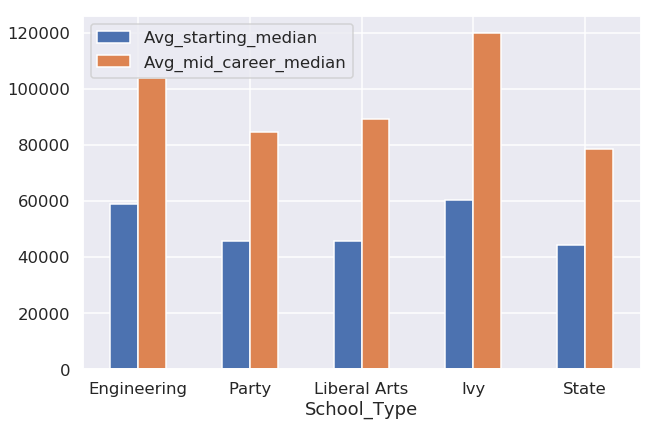

In [9]:
Salary.plot.bar(x = 'School_Type',figsize = (10,6.5),rot = 0)

In [ ]:
#df1=df.loc[(df['Region']=='Northeastern')]
#df2=df.loc[(df['Region']=='California')]
#df3=df.loc[(df['Region']=='Southern')]
#df4=df.loc[(df['Region']=='Western')]
#df5=df.loc[(df['Region']=='Midwestern')]


In [29]:
outcome_1, predictors_1 = patsy.dmatrices('Starting_Median_Salary ~ School_Type',df,return_type = "matrix")
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                              OLS Regression Results                              
Dep. Variable:     Starting_Median_Salary   R-squared:                       0.502
Model:                                OLS   Adj. R-squared:                  0.495
Method:                     Least Squares   F-statistic:                     66.56
Date:                    Sun, 09 Jun 2019   Prob (F-statistic):           7.06e-39
Time:                            13:58:55   Log-Likelihood:                -2645.5
No. Observations:                     269   AIC:                             5301.
Df Residuals:                         264   BIC:                             5319.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [18]:
print(df.loc[df['Region']=="Northeastern"].mean())
print(df.loc[df['Region']=="California"].mean())
print(df.loc[df['Region']=="Southern"].mean())
print(df.loc[df['Region']=="Western"].mean())
print(df.loc[df['Region']=="Midwestern"].mean())

Starting_Median_Salary                49267.142857
Mid_Career_Median_Salary              93518.571429
Mid_Career_25th_Percentile_Salary     66601.428571
Mid_Career_75th_Percentile_Salary    133350.000000
dtype: float64
Starting_Median_Salary                50155.555556
Mid_Career_Median_Salary              91633.333333
Mid_Career_25th_Percentile_Salary     66096.296296
Mid_Career_75th_Percentile_Salary    124844.444444
dtype: float64
Starting_Median_Salary                44288.235294
Mid_Career_Median_Salary              80302.941176
Mid_Career_25th_Percentile_Salary     57839.705882
Mid_Career_75th_Percentile_Salary    110188.235294
dtype: float64
Starting_Median_Salary                44151.282051
Mid_Career_Median_Salary              78135.897436
Mid_Career_25th_Percentile_Salary     56238.461538
Mid_Career_75th_Percentile_Salary    106161.538462
dtype: float64
Starting_Median_Salary                43801.5625
Mid_Career_Median_Salary              77637.5000
Mid_Career_25th_Percentile

In [19]:
region = {'1':["Northeastern",49267.142857,93518.571429],'2':["California",50155.555556,91633.333333],
         '3':["Southern", 44288.235294,80302.941176],'4':["Western",44151.282051,78135.897436],
         '5':["Midwestern",43801.5625,77637.5000]}
Region = pd.DataFrame.from_dict(region,orient = 'index',columns=['Region','Avg_starting_median',
                                                                 'Avg_mid_career_median'])

In [20]:
Region

,Region,Avg_starting_median,Avg_mid_career_median
1,Northeastern,49267.142857,93518.571429
2,California,50155.555556,91633.333333
3,Southern,44288.235294,80302.941176
4,Western,44151.282051,78135.897436
5,Midwestern,43801.562500,77637.500000


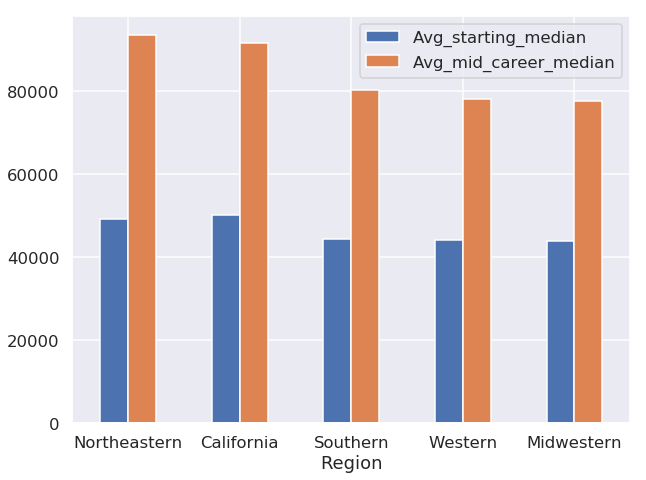

In [21]:
Region.plot.bar(x = 'Region',figsize = (10,7.5),rot = 0)